NameError: name 'Exp' is not defined

True
1
NVIDIA GeForce RTX 3090
0


In [46]:
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

for ii in range(args.itr):#itr就是实验次数可不是epoch，parser.add_argument('--itr', type=int, default=2, help='experiments times')
    # setting record of experiments
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)#setting是用来保存模型的名字用的，很细节
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)
    torch.cuda.empty_cache()
    print(3)



Use GPU: cuda:0
1
>>>>>>>start training : ETTh1_96_24_Autoformer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8521
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.3611072
	speed: 0.0614s/iter; left time: 157.2485s
	iters: 200, epoch: 1 | loss: 0.3248774
	speed: 0.0348s/iter; left time: 85.7256s
Epoch: 1 cost time: 12.040599346160889
Epoch: 1, Steps: 266 | Train Loss: 0.3626875 Vali Loss: 0.6365376 Test Loss: 0.4080311
Validation loss decreased (inf --> 0.636538).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.3774808
	speed: 0.1135s/iter; left time: 260.4290s
	iters: 200, epoch: 2 | loss: 0.3226640
	speed: 0.0346s/iter; left time: 76.0447s
Epoch: 2 cost time: 9.73805284500122
Epoch: 2, Steps: 266 | Train Loss: 0.3071145 Vali Loss: 0.6506287 Test Loss: 0.3897783
EarlyStopping counter: 1 out of 3
Updating learning rate to 5e-05
	iters: 100, epoch: 3 | loss: 0.2361423
	speed: 0.1102s/iter;

In [63]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example #模仿informer 的 colab example的custom_dataset与predict部分
import pandas as pd
exp.args.root_path = './dataset/ETT-small/'
exp.args.data_path = 'ETTh2.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [64]:

args.do_predict = True
if args.do_predict:
    print('>>>>>>>predicting : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    prediction=exp.predict(setting, True)#data_factory做好了pred里面的batch_size=1的情况，是autoformer在informer基础之上做的
    torch.cuda.empty_cache()

>>>>>>>predicting : ETTh1_96_24_Autoformer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
pred 1


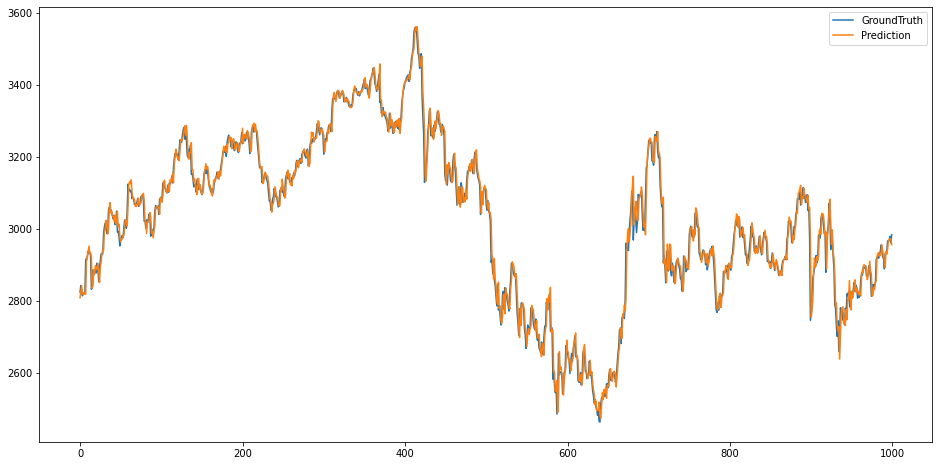

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
setting = 'SHstock_Autoformer_custom_ftMS_sl5_ll5_pl1_dm512_nh8_el5_dl3_df2048_fc1_ebtimeF_dtTrue_test_0'
# Exp = Exp_Main
# exp = Exp(args)
# exp.predict(setting, True)
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')
metrics = np.load('./results/'+setting+'/metrics.npy')
preds.shape, trues.shape, metrics.shape


# prediction = np.load('./results/'+setting+'/real_prediction.npy')
# print(prediction.shape)
# print(prediction)
import seaborn as sns
plt.figure(figsize=(16, 8))
# matplotlib.use('TKAgg')
# plt.plot(prediction[:,:,-1],label='prediction')
plt.plot(trues[:, -1], label='GroundTruth')
plt.plot(preds[:, -1], label='Prediction')
plt.legend()
plt.show()

